# Data set resource
- https://github.com/udacity/CarND-Vehicle-Detection
- http://www.gti.ssr.upm.es/data/Vehicle_database.html
- http://www.cvlibs.net/datasets/kitti/

In [1]:
# Load imports
import numpy as np
import cv2
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# Import training dataset of vehicle/non-vehicles
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')

In [3]:
len(car)

8792

In [4]:
len(no_car)

8968

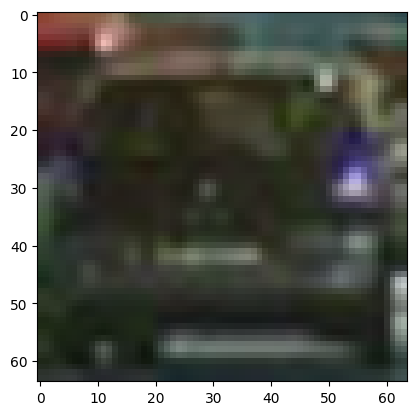

In [5]:
image_color = cv2.imread(car[300])
plt.imshow(image_color)

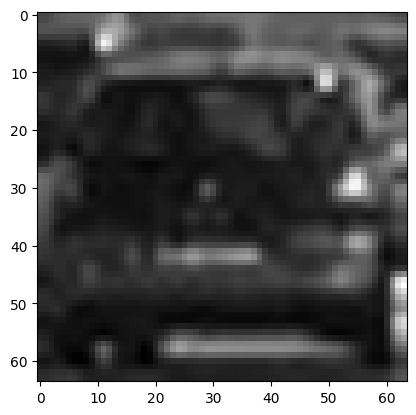

In [6]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

In [7]:
# Get HOG Features for all training data
'''
HOG stands for Histogram of Oriented Gradients. 
It's a feature descriptor used for object detection and image analysis. 
The primary goal of HOG is to detect objects, particularly by identifying their shape or structure.
'''
car_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)



In [8]:
X_car = np.vstack(car_hog_accum).astype(np.float64)  

In [9]:
y_car = np.ones(len(X_car))

In [10]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)



In [11]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)

In [12]:
y_nocar = np.zeros(len(X_nocar))

In [13]:
X = np.vstack((X_car, X_nocar))
X.shape

(17760, 396)

In [14]:
y = np.hstack((y_car, y_nocar))
y.shape

(17760,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [16]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

LinearSVC()

<Axes: >

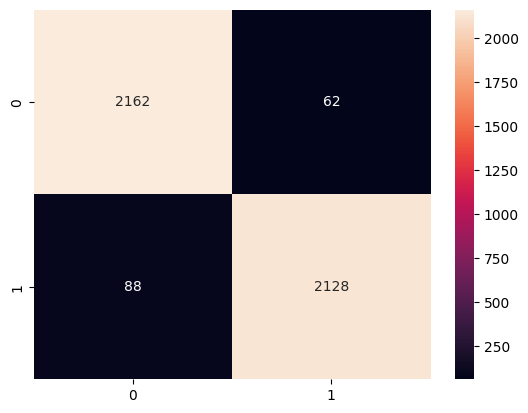

In [17]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt ="d")

In [18]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

In [21]:
'''
This code is performing hypermarameter tuning using 'GridSearchCV' on a Support Vector Classifier (SVC) model to improve its performance. 

- param_grid: is a dictionary that defines the parameters and their corresponding values that we want to tune for the SVC model. 
- x: Regularization parameter. It controls the trade-off between having a smooth decision boundary and correctly classifying the training points. A smaller value of 'c' makes the decision boundary smoother, while
a larger value of 'c' aims to classify all training examples. 
- Gamma: This is a parameter for the RBF(Radial Basis Function) kernel. It defines how far the influence of a single training example reaches. Low values of gamma mean far an dhigh values mean close. If gamma is too
large, the model will become too sensitive to individual data points(overfitting). If it is too small, the model may no capture the complexity of the data(underfitting).
- kernel: This specifies the kernel type to be used in the algorithm. In this case 'rbf' indicates that the Radial Basis function kernel will be used. The RBK kernel is a popular choice for non-linear problems.

- GridSearchCV: Technique for tuning hyperparameters. 
- SVC(): This is an instance of the Support Vector Classifier. 
- Refit = True: This tells 'GridSearchCV' to refit the model using the best-found parameters on the whole dataset after completing the search. This ensures that the returned model is optimied with the best 
parameters found. 
- Verbose = 4: This sets the verbosity level. The higher the more details are printed during training. 
'''
# Improve the model

param_grid = {'C' : [0.1, 1, 10, 100], 'gamma': [1,0.1, 0.01, 0.001], 'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=  26.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=  23.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=  23.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=  23.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.968 total time=  22.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=  14.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=  13.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=  15.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.959 total time=  15.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.968 total time=  15.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.929 total time=  35.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

SVC(C=10, gamma=1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2224
         1.0       0.99      0.99      0.99      2216

    accuracy                           0.99      4440
   macro avg       0.99      0.99      0.99      4440
weighted avg       0.99      0.99      0.99      4440



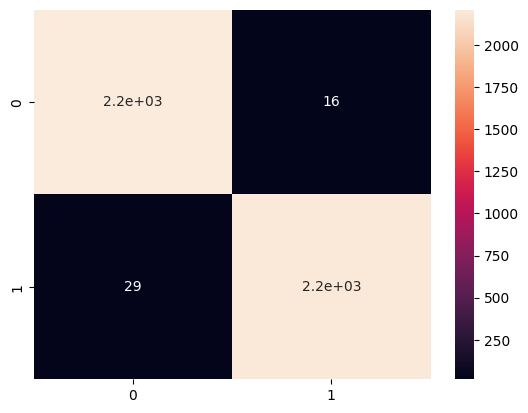

In [22]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot = True)
print(classification_report(y_test, grid_predictions))

In [ ]:
# Testing the model